In [1239]:
%pip install matplotlib scikit-learn pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1240]:
import json
import pandas as pd
from pathlib import Path
import os

# Set paths
base_dir = os.path.join(os.path.dirname(os.getcwd()), 'dataset')
train_json_path = os.path.join(base_dir, 'train', 'labels.json')
val_json_path = os.path.join(base_dir, 'validation', 'labels.json')
train_images_dir = os.path.join(base_dir, 'train', 'data')
val_images_dir = os.path.join(base_dir, 'validation', 'data')

def load_filtered_annotations(json_path, target_class='Plastic bag'):
    """Load and filter annotations for only the target class"""
    with open(json_path) as f:
        data = json.load(f)
    
    images = {img['id']: img for img in data['images']}
    categories = {cat['id']: cat['name'] for cat in data['categories']}
    
    records = []
    for ann in data['annotations']:
        img = images[ann['image_id']]
        class_name = categories[ann['category_id']]
        
        if class_name == target_class: 
            records.append({
                'ImageID': Path(img['file_name']).stem,
                'LabelName': '/m/05gqfk',
                'XMin': ann['bbox'][0] / img['width'],
                'YMin': ann['bbox'][1] / img['height'],
                'XMax': (ann['bbox'][0] + ann['bbox'][2]) / img['width'],
                'YMax': (ann['bbox'][1] + ann['bbox'][3]) / img['height']
            })
    return pd.DataFrame(records)

# Load only plastic bag annotations
print(f"Loading training data from: {train_json_path}")
df_train = load_filtered_annotations(train_json_path)
print(f"Loading validation data from: {val_json_path}")
df_validation = load_filtered_annotations(val_json_path)

# Update paths for the notebook
data_path_validation = os.path.join(val_images_dir, '*.jpg')
data_path_train = os.path.join(train_images_dir, '*.jpg')
validation_images_path = val_images_dir
train_images_path = train_images_dir

# Verify
print("\nFiltered Data loaded successfully!")
print(f"Found {len(df_train)} plastic bag training instances")
print(f"Found {len(df_validation)} plastic bag validation instances")
print("\nSample training data:")
print(df_train.head())

Loading training data from: /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/train/labels.json
Loading validation data from: /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/validation/labels.json

Filtered Data loaded successfully!
Found 40 plastic bag training instances
Found 9 plastic bag validation instances

Sample training data:
            ImageID  LabelName    XMin    YMin    XMax    YMax
0  004bd64410736c69  /m/05gqfk  0.2328  0.1186  0.6611  0.7358
1  007653c739edf912  /m/05gqfk  0.7435  0.0523  0.9641  0.9428
2  008e55e8866c3a92  /m/05gqfk  0.0000  0.0000  0.9990  0.9987
3  00d67ab9e6db2059  /m/05gqfk  0.2600  0.2644  0.4800  0.6251
4  00f4db8fcca9763c  /m/05gqfk  0.0027  0.1880  0.3873  0.8620


In [1241]:
len(df_train)

40

In [1242]:
len(df_validation)

9

In [1243]:
import glob
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

24


In [1244]:
import glob
counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

9


In [1245]:
import glob


train_list_ids = []
validation_list_ids = []

def get_ids(split, print_this, to_append_list):
    try:
        if split == data_path_train:
            folder = glob.glob(data_path_train)
            img_ids = [Path(f).stem for f in folder]
        elif split == data_path_validation:
            folder = glob.glob(data_path_validation)
            img_ids = [Path(f).stem for f in folder]
        else:
            raise Exception("Invalid Parameter")
        
        if not img_ids:
            print(f"Warning: No images found in {split}")
        
        to_append_list.extend(img_ids)
        print(f"Found {len(img_ids)} images in {split}")
        print(print_this)
        return True
    except Exception as e:
        print(f"Error in get_ids: {str(e)}")
        return False

# Clear and reinitialize lists
train_list_ids = []
validation_list_ids = []

# Run with debugging
print("\nProcessing training images:")
success_train = get_ids(data_path_train, "Finished training images", train_list_ids)

print("\nProcessing validation images:")
success_val = get_ids(data_path_validation, "Finished validation images", validation_list_ids)

# Verify results
if success_train and train_list_ids:
    print(f"\nFirst training ID: {train_list_ids[0]}")
else:
    print("Failed to get training IDs")

if success_val and validation_list_ids:
    print(f"First validation ID: {validation_list_ids[0]}")
else:
    print("Failed to get validation IDs")




Processing training images:
Found 24 images in /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/train/data/*.jpg
Finished training images

Processing validation images:
Found 9 images in /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/validation/data/*.jpg
Finished validation images

First training ID: 084a2d27ffddd858
First validation ID: ecd5fc22a65b8d32


In [1246]:
get_ids(data_path_train, "I finished the task", train_list_ids)

Found 24 images in /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/train/data/*.jpg
I finished the task


True

In [1247]:
train_list_ids[0]

'084a2d27ffddd858'

In [1248]:
get_ids(data_path_validation, "I finished the task", validation_list_ids)

Found 9 images in /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/validation/data/*.jpg
I finished the task


True

In [1249]:
validation_list_ids[1]

'1602934b52b119cc'

In [1250]:
# Load and analyze class information from JSON annotations
def get_class_info(json_path):
    with open(json_path) as f:
        data = json.load(f)
    
    # Get all categories
    categories = {cat['id']: cat['name'] for cat in data['categories']}
    
    # Count occurrences of each class
    class_counts = {}
    for ann in data['annotations']:
        class_name = categories[ann['category_id']]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
    
    return pd.DataFrame({
        'className': list(categories.values()),
        'Object': list(categories.values()),  # Duplicate for compatibility
        'Count': [class_counts.get(name, 0) for name in categories.values()]
    })

# Get class information for both datasets
train_classes_df = get_class_info(train_json_path)
validation_classes_df = get_class_info(val_json_path)



In [1251]:
# Filter for plastic bags (case insensitive)
plastic_bag_names = ['plastic bag', 'Plastic bag', 'plastic_bag']  # Common variations
train_identifer = train_classes_df[train_classes_df['className'].str.lower().isin([name.lower() for name in plastic_bag_names])]
validation_identifer = validation_classes_df[validation_classes_df['className'].str.lower().isin([name.lower() for name in plastic_bag_names])]

print("Training set class information:")
print(train_classes_df)
print("\nPlastic bags in training set:")
print(train_identifer)
print('-'*40)
print("Validation set class information:")
print(validation_classes_df)
print("\nPlastic bags in validation set:")
print(validation_identifer)

Training set class information:
           className            Object  Count
0                Box               Box      3
1              Chair             Chair      4
2           Clothing          Clothing      6
3               Food              Food      2
4           Footwear          Footwear      5
5               Girl              Girl      3
6          Human arm         Human arm      3
7         Human face        Human face      3
8         Human hair        Human hair      3
9         Human head        Human head      3
10       Human mouth       Human mouth      1
11        Human nose        Human nose      2
12             Jeans             Jeans      5
13      Land vehicle      Land vehicle      1
14  Luggage and bags  Luggage and bags     10
15            Mammal            Mammal      3
16               Man               Man      2
17            Person            Person      3
18       Plastic bag       Plastic bag     40
19          Squirrel          Squirrel      1
20

In [1252]:
import random

def random_row_from_df(split):
    dataframe = ""
    
    if split == "train":
        dataframe,ids_to_check = df_train, train_list_ids#517
    elif split == "validation":
        dataframe,ids_to_check = df_validation, validation_list_ids#9
    else:
        raise Exception("Invalid parameter, must be either train or validation")
    
    img_ids_len = len(ids_to_check)
    rand = random.randint(0,img_ids_len-1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/05gqfk')]
    print(r)

In [1253]:
random_row_from_df("train")

015f845e4e01b04c
             ImageID  LabelName    XMin    YMin    XMax    YMax
10  015f845e4e01b04c  /m/05gqfk  0.5188  0.7467  0.6475  0.9817
11  015f845e4e01b04c  /m/05gqfk  0.6550  0.7183  0.7288  0.9267


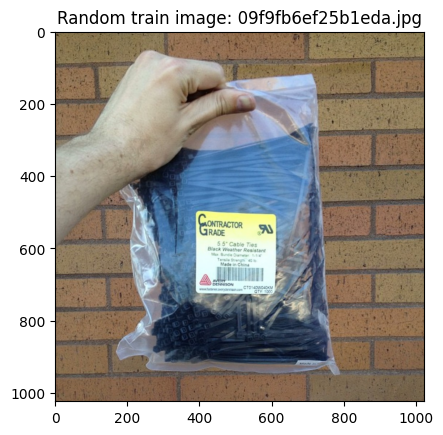

In [1254]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def visualize_random_image(split):
    if split == 'train':
        images_path = train_images_path
    elif split == 'validation':
        images_path = validation_images_path
    else:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    images_paths = glob.glob(os.path.join(images_path, '*.jpg'))
    random_image = random.choice(images_paths)
    img = mpimg.imread(random_image)
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.title(f"Random {split} image: {Path(random_image).name}")
    plt.show()

visualize_random_image("train")

=== Training Images ===

Visualizing train set (has 48 total images)


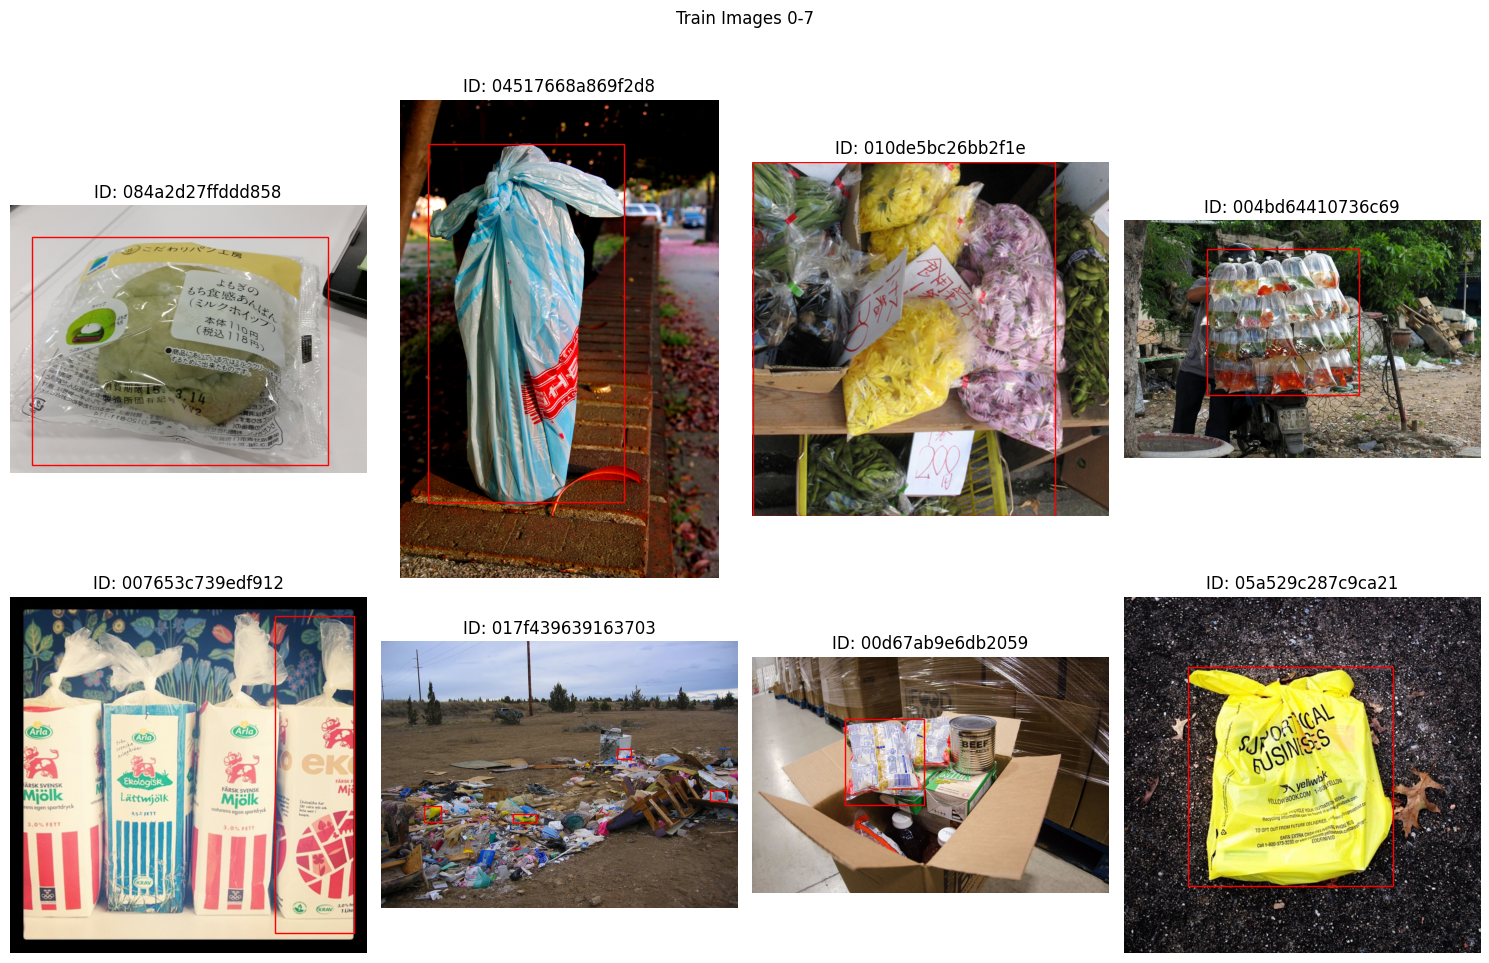


=== Validation Images ===

Visualizing validation set (has 18 total images)


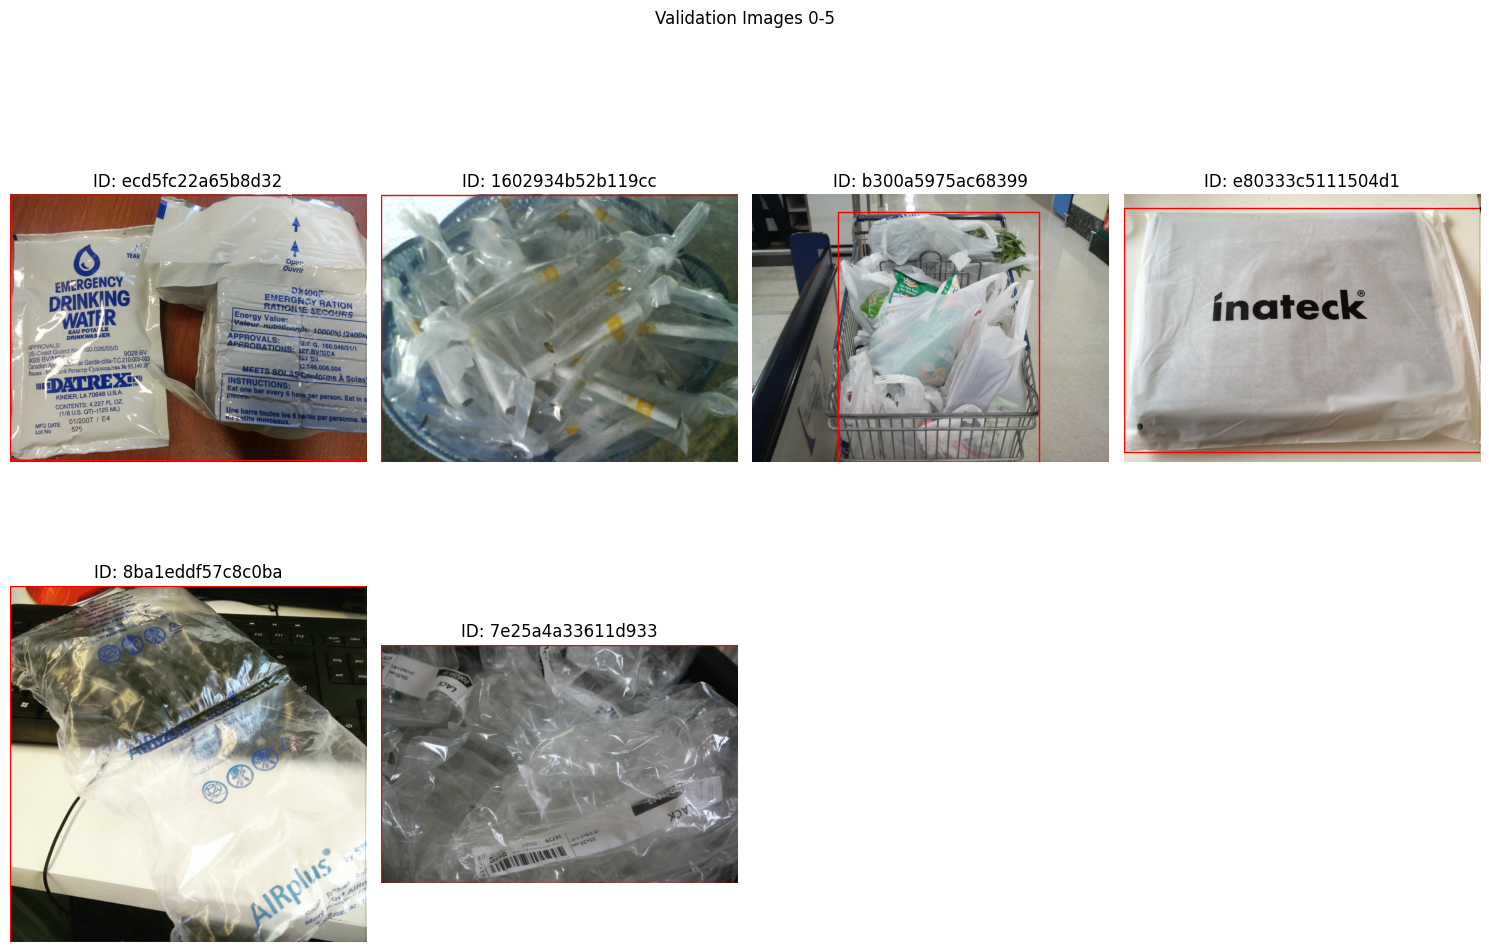

In [1255]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
from pathlib import Path

def visualize_many(from_num, to_num, dataset):
    """Visualize multiple images"""
    if dataset == 'train':
        image_ids = train_list_ids
        base_path = data_path_train.replace('*.jpg', '')
    elif dataset == 'validation':
        image_ids = validation_list_ids
        base_path = data_path_validation.replace('*.jpg', '')
    else:
        raise ValueError("Dataset must be 'train' or 'validation'")
    
    total_images = len(image_ids)
    print(f"\nVisualizing {dataset} set (has {total_images} total images)")
    
    # Validate requested range
    if from_num >= total_images:
        print(f"Start number {from_num} >= total images {total_images}")
        return
    to_num = min(to_num, total_images)
    
    # Calculate grid layout
    num_images = to_num - from_num
    columns = 4
    rows = (num_images + columns - 1) // columns
    
    # Create figure
    fig = plt.figure(figsize=(15, 5*rows))
    plt.suptitle(f"{dataset.capitalize()} Images {from_num}-{to_num-1}", y=1.02)
    
    # Display images
    for i in range(from_num, to_num):
        try:
            img_id = image_ids[i]
            img_path = os.path.join(base_path, f"{img_id}.jpg")
            
            if not os.path.exists(img_path):
                print(f"Image not found: {img_path}")
                continue
                
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(rows, columns, i-from_num+1)
            ax.imshow(img)
            ax.set_title(f"ID: {img_id}")
            ax.axis('off')
            
            # Add bounding boxes if available
            if dataset == 'train':
                boxes = df_train[df_train['ImageID'] == img_id]
            else:
                boxes = df_validation[df_validation['ImageID'] == img_id]
                
            for _, row in boxes.iterrows():
                xmin = row['XMin'] * img.shape[1]
                xmax = row['XMax'] * img.shape[1]
                ymin = row['YMin'] * img.shape[0]
                ymax = row['YMax'] * img.shape[0]
                
                rect = plt.Rectangle(
                    (xmin, ymin), xmax-xmin, ymax-ymin,
                    linewidth=1, edgecolor='r', facecolor='none'
                )
                ax.add_patch(rect)
                
        except Exception as e:
            print(f"Error processing image {i}: {str(e)}")
    
    plt.tight_layout()
    plt.show()

# Example usage:
print("=== Training Images ===")
visualize_many(0, 8, "train")  # Show first 8 training images

print("\n=== Validation Images ===")
visualize_many(0, 6, "validation")  # Show first 6 validation images

In [1256]:
df_validation.loc[(df_validation['ImageID'] == 'ecd5fc22a65b8d32') & (df_validation.LabelName == '/m/05gqfk')]


ImageID  LabelName  XMin  YMin    XMax    YMax
8  ecd5fc22a65b8d32  /m/05gqfk   0.0   0.0  0.9984  0.9917

Image: /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/dataset/train/data/084a2d27ffddd858.jpg
Dimensions: 1024 x 768


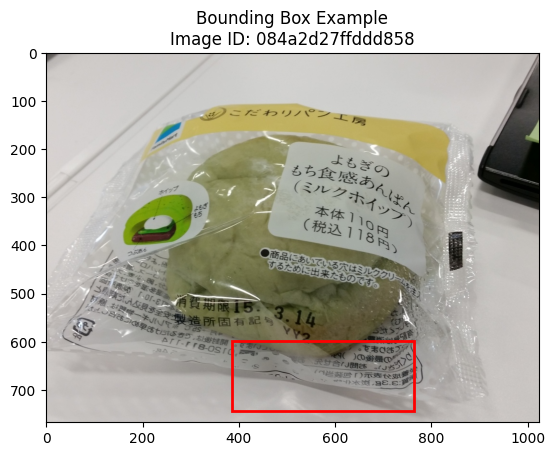

In [1257]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Use the first available image from the training set
if train_list_ids:
    image_id = train_list_ids[0]  # Get first training image ID
    image_path = os.path.join(data_path_train.replace('*.jpg', ''), f"{image_id}.jpg")
    
    # Open and display the image
    im = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(im)
    
    # Print image info
    image_width, image_height = im.size
    print(f"Image: {image_path}")
    print(f"Dimensions: {image_width} x {image_height}")
    
    # Example bounding box coordinates (normalized)
    xmin, ymin = 0.377083, 0.778125  # Normalized coordinates
    xmax, ymax = 0.745833, 0.96875
    
    # Convert to pixel coordinates
    xmin_px = xmin * image_width
    xmax_px = xmax * image_width
    ymin_px = ymin * image_height
    ymax_px = ymax * image_height
    
    # Draw the bounding box
    rect = patches.Rectangle(
        (xmin_px, ymin_px), 
        xmax_px - xmin_px,  # width
        ymax_px - ymin_px,  # height
        linewidth=2, 
        edgecolor='red', 
        facecolor='none'
    )
    ax.add_patch(rect)
    
    plt.title(f"Bounding Box Example\nImage ID: {image_id}")
    plt.show()
else:
    print("No training images found. Please check your data_path_train and train_list_ids")

0.24625 0.421875 0.324578 0.650094
252.16 432.0 221.68677399999999 444.01420199999995
0.168125 0.999375 0.22514100000000004 0.9990619999999999
172.16 1023.36 153.77130300000002 682.359346


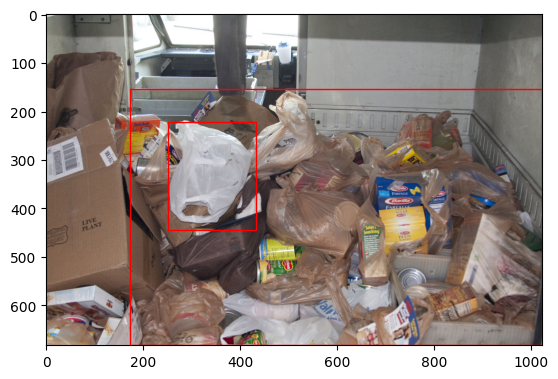

In [1258]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image
from pathlib import Path

def visualize_bb(dataset):
    images_path = train_images_path if dataset == 'train' else validation_images_path if dataset == 'validation' else 0
    if images_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    # Add pattern for glob
    image_folder = os.path.join(images_path, '*.jpg')
    images_paths = glob.glob(image_folder)
    num_of_images = len(images_paths)
    if num_of_images == 0:
        raise ValueError(f"No images found in {images_path}. Check path and files.")
    
    random_int = random.randint(0, num_of_images -1)
    random_image = images_paths[random_int]
    #print(random_image)
    img = Image.open(random_image)
    id_of_image = Path(random_image).stem  # Use stem for ID (no slicing)
    
    df = df_train if dataset == 'train' else df_validation
    df_rows = df.loc[(df.ImageID == id_of_image) & (df.LabelName == '/m/05gqfk')]
    
    image_width, image_height = img.size
    
    fig ,ax = plt.subplots()
    ax.imshow(img)
    
    
    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        print(new_xmin,new_xmax,new_ymin,new_ymax)
        
        
        width = new_xmax - new_xmin
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((new_xmin,new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()
    
visualize_bb("train")

In [1259]:
print(len(df_train))
print(len(df_validation))

40
9


In [1260]:
def clean_dataframe(df_for_train, df_for_validation):
    # Debug: Check DataFrame content
    print("df_train LabelName unique:", df_for_train['LabelName'].unique())
    print("df_validation LabelName unique:", df_for_validation['LabelName'].unique())
    print(f"Before processing: len(df_train) = {len(df_for_train)}, len(df_validation) = {len(df_for_validation)}")
    
    # No filtering needed since all rows are '/m/05gqfk'
    df_train_cleansed = df_for_train
    df_validation_cleansed = df_for_validation
    
    print(f"After processing: len(df_train_cleansed) = {len(df_train_cleansed)}, len(df_validation_cleansed) = {len(df_validation_cleansed)}")
    return df_train_cleansed, df_validation_cleansed

df_train_cleansed, df_validation_cleansed = clean_dataframe(df_train, df_validation)

df_train LabelName unique: ['/m/05gqfk']
df_validation LabelName unique: ['/m/05gqfk']
Before processing: len(df_train) = 40, len(df_validation) = 9
After processing: len(df_train_cleansed) = 40, len(df_validation_cleansed) = 9


In [1261]:
len(df_train_cleansed)

#We have 517 train images, but some of those images have multiple bb, and the 986 is the number
#of rows we have in our new df_train_cleansed, and each row represents one bbounding



40

In [1262]:
986/517

1.9071566731141198

In [1263]:
len(df_validation_cleansed)

9

In [1264]:
df_validation_cleansed

ImageID  LabelName    XMin    YMin    XMax    YMax
0  1602934b52b119cc  /m/05gqfk  0.0000  0.0000  1.0000  1.0000
1  488ab15e2780bec9  /m/05gqfk  0.0000  0.0236  1.0000  1.0000
2  4e24222b68123ef3  /m/05gqfk  0.3771  0.7781  0.7458  0.9688
3  527bec033e8298a5  /m/05gqfk  0.1078  0.1062  0.9953  0.9938
4  7e25a4a33611d933  /m/05gqfk  0.0000  0.0000  1.0000  1.0000
5  8ba1eddf57c8c0ba  /m/05gqfk  0.0000  0.0000  1.0000  1.0000
6  b300a5975ac68399  /m/05gqfk  0.2406  0.0646  0.8031  1.0000
7  e80333c5111504d1  /m/05gqfk  0.0000  0.0500  0.9984  0.9625
8  ecd5fc22a65b8d32  /m/05gqfk  0.0000  0.0000  0.9984  0.9917

In [1265]:
df_train_cleansed

ImageID  LabelName    XMin    YMin    XMax    YMax
0   004bd64410736c69  /m/05gqfk  0.2328  0.1186  0.6611  0.7358
1   007653c739edf912  /m/05gqfk  0.7435  0.0523  0.9641  0.9428
2   008e55e8866c3a92  /m/05gqfk  0.0000  0.0000  0.9990  0.9987
3   00d67ab9e6db2059  /m/05gqfk  0.2600  0.2644  0.4800  0.6251
4   00f4db8fcca9763c  /m/05gqfk  0.0027  0.1880  0.3873  0.8620
5   00f4db8fcca9763c  /m/05gqfk  0.3600  0.3920  0.6587  0.9990
6   00f4db8fcca9763c  /m/05gqfk  0.5200  0.1440  0.9540  0.9990
7   010de5bc26bb2f1e  /m/05gqfk  0.0000  0.0000  0.8500  0.9980
8   010e5642fc0b392f  /m/05gqfk  0.4994  0.1275  0.9994  0.9042
9   011c2e4461eb1fdc  /m/05gqfk  0.3068  0.1525  0.9984  0.9988
10  015f845e4e01b04c  /m/05gqfk  0.5188  0.7467  0.6475  0.9817
11  015f845e4e01b04c  /m/05gqfk  0.6550  0.7183  0.7288  0.9267
12  017f439639163703  /m/05gqfk  0.1187  0.6167  0.1663  0.6767
13  017f439639163703  /m/05gqfk  0.3706  0.6442  0.4338  0.6783
14  017f439639163703  /m/05gqfk  0.6625  0.4025  0.7013  0.4392
15  017f439639163703  /m/05gqfk  0.9219  0.5542  0.9688  0.5975
16  02362e80f8bf6a64  /m/05gqfk  0.2462  0.3246  0.4219  0.6501
17  02362e80f8bf6a64  /m/05gqfk  0.1681  0.2251  0.9994  0.9991
18  029cf7b6d1a98a8c  /m/05gqfk  0.0000  0.1000  0.9967  0.7338
19  0345e899cc440fde  /m/05gqfk  0.3470  0.2817  0.4555  0.4626
20  04517668a869f2d8  /m/05gqfk  0.0856  0.0925  0.7027  0.8406
21  05307e6f3f7d7daf  /m/05gqfk  0.2612  0.1317  0.9994  0.9991
22  05642dbfac7ae5b0  /m/05gqfk  0.6398  0.3198  0.8469  0.9062
23  05642dbfac7ae5b0  /m/05gqfk  0.2227  0.2031  0.9945  0.9708
24  05642dbfac7ae5b0  /m/05gqfk  0.2250  0.1958  0.9992  0.9719
25  059da2366c3be42c  /m/05gqfk  0.1081  0.0356  0.8831  0.9991
26  05a529c287c9ca21  /m/05gqfk  0.1812  0.1969  0.7547  0.8109
27  0603f22006991971  /m/05gqfk  0.0000  0.3371  0.9994  0.8535
28  0603f22006991971  /m/05gqfk  0.0650  0.2836  0.0869  0.3033
29  0603f22006991971  /m/05gqfk  0.3906  0.2028  0.4431  0.2685
30  0603f22006991971  /m/05gqfk  0.7825  0.2122  0.8506  0.2967
31  073dd5489a8faed7  /m/05gqfk  0.3844  0.4562  0.4688  0.7042
32  073dd5489a8faed7  /m/05gqfk  0.4703  0.6667  0.6562  0.9625
33  073dd5489a8faed7  /m/05gqfk  0.5906  0.7021  0.6672  0.9833
34  073dd5489a8faed7  /m/05gqfk  0.6141  0.6854  0.7047  0.8104
35  084a2d27ffddd858  /m/05gqfk  0.0619  0.1167  0.8931  0.9717
36  0889eb8501b7adce  /m/05gqfk  0.2257  0.0366  0.8443  0.9935
37  08c7e8816f9c9ed9  /m/05gqfk  0.4119  0.6607  0.6381  0.9794
38  08c7e8816f9c9ed9  /m/05gqfk  0.4619  0.0093  0.6562  0.4729
39  09f9fb6ef25b1eda  /m/05gqfk  0.2026  0.2647  0.7647  0.9216

In [1266]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df_train_cleansed, test_size = 0.2, random_state = 42)


In [1267]:
train

ImageID  LabelName    XMin    YMin    XMax    YMax
39  09f9fb6ef25b1eda  /m/05gqfk  0.2026  0.2647  0.7647  0.9216
6   00f4db8fcca9763c  /m/05gqfk  0.5200  0.1440  0.9540  0.9990
25  059da2366c3be42c  /m/05gqfk  0.1081  0.0356  0.8831  0.9991
9   011c2e4461eb1fdc  /m/05gqfk  0.3068  0.1525  0.9984  0.9988
13  017f439639163703  /m/05gqfk  0.3706  0.6442  0.4338  0.6783
31  073dd5489a8faed7  /m/05gqfk  0.3844  0.4562  0.4688  0.7042
34  073dd5489a8faed7  /m/05gqfk  0.6141  0.6854  0.7047  0.8104
8   010e5642fc0b392f  /m/05gqfk  0.4994  0.1275  0.9994  0.9042
17  02362e80f8bf6a64  /m/05gqfk  0.1681  0.2251  0.9994  0.9991
24  05642dbfac7ae5b0  /m/05gqfk  0.2250  0.1958  0.9992  0.9719
0   004bd64410736c69  /m/05gqfk  0.2328  0.1186  0.6611  0.7358
33  073dd5489a8faed7  /m/05gqfk  0.5906  0.7021  0.6672  0.9833
5   00f4db8fcca9763c  /m/05gqfk  0.3600  0.3920  0.6587  0.9990
11  015f845e4e01b04c  /m/05gqfk  0.6550  0.7183  0.7288  0.9267
1   007653c739edf912  /m/05gqfk  0.7435  0.0523  0.9641  0.9428
29  0603f22006991971  /m/05gqfk  0.3906  0.2028  0.4431  0.2685
21  05307e6f3f7d7daf  /m/05gqfk  0.2612  0.1317  0.9994  0.9991
2   008e55e8866c3a92  /m/05gqfk  0.0000  0.0000  0.9990  0.9987
30  0603f22006991971  /m/05gqfk  0.7825  0.2122  0.8506  0.2967
36  0889eb8501b7adce  /m/05gqfk  0.2257  0.0366  0.8443  0.9935
3   00d67ab9e6db2059  /m/05gqfk  0.2600  0.2644  0.4800  0.6251
35  084a2d27ffddd858  /m/05gqfk  0.0619  0.1167  0.8931  0.9717
23  05642dbfac7ae5b0  /m/05gqfk  0.2227  0.2031  0.9945  0.9708
32  073dd5489a8faed7  /m/05gqfk  0.4703  0.6667  0.6562  0.9625
10  015f845e4e01b04c  /m/05gqfk  0.5188  0.7467  0.6475  0.9817
22  05642dbfac7ae5b0  /m/05gqfk  0.6398  0.3198  0.8469  0.9062
18  029cf7b6d1a98a8c  /m/05gqfk  0.0000  0.1000  0.9967  0.7338
20  04517668a869f2d8  /m/05gqfk  0.0856  0.0925  0.7027  0.8406
7   010de5bc26bb2f1e  /m/05gqfk  0.0000  0.0000  0.8500  0.9980
14  017f439639163703  /m/05gqfk  0.6625  0.4025  0.7013  0.4392
28  0603f22006991971  /m/05gqfk  0.0650  0.2836  0.0869  0.3033
38  08c7e8816f9c9ed9  /m/05gqfk  0.4619  0.0093  0.6562  0.4729

In [1268]:
test

ImageID  LabelName    XMin    YMin    XMax    YMax
19  0345e899cc440fde  /m/05gqfk  0.3470  0.2817  0.4555  0.4626
16  02362e80f8bf6a64  /m/05gqfk  0.2462  0.3246  0.4219  0.6501
15  017f439639163703  /m/05gqfk  0.9219  0.5542  0.9688  0.5975
26  05a529c287c9ca21  /m/05gqfk  0.1812  0.1969  0.7547  0.8109
4   00f4db8fcca9763c  /m/05gqfk  0.0027  0.1880  0.3873  0.8620
12  017f439639163703  /m/05gqfk  0.1187  0.6167  0.1663  0.6767
37  08c7e8816f9c9ed9  /m/05gqfk  0.4119  0.6607  0.6381  0.9794
27  0603f22006991971  /m/05gqfk  0.0000  0.3371  0.9994  0.8535

In [1269]:
788 + 198

986

In [1270]:
import os

os.makedirs("001.Plastic_bag/images/train", exist_ok=True)
os.makedirs("001.Plastic_bag/images/test", exist_ok=True)

In [1271]:
test_ids = test["ImageID"].values.tolist()


In [1272]:
len(test_ids)

8

In [1273]:
train_ids = train["ImageID"].values.tolist()

In [1274]:
len(train_ids)

32

In [1275]:
import shutil
import glob
from pathlib import Path
import os

# Dynamically set base_dir
base_dir = os.path.join(os.path.dirname(os.getcwd()), 'dataset')

# Create directories
os.makedirs(os.path.join(base_dir, '001.Plastic_bag/images/train'), exist_ok=True)
os.makedirs(os.path.join(base_dir, '001.Plastic_bag/images/test'), exist_ok=True)

# Move/copy images for test
to_loop = os.path.join(base_dir, 'train/data/*.jpg')
folder = glob.glob(to_loop)
new_path_test = os.path.join(base_dir, '001.Plastic_bag/images/test')

for path in folder:
    id = Path(path).stem
    if id in test_ids:
        if id in train_ids:
            shutil.copy(path, f"{new_path_test}/{id}.jpg")
        else:
            shutil.copy(path, f"{new_path_test}/{id}.jpg")  # Copy to preserve source

# Move/copy images for train
new_path_train = os.path.join(base_dir, '001.Plastic_bag/images/train')
for path in folder:
    id = Path(path).stem
    if id in train_ids:
        shutil.copy(path, f"{new_path_train}/{id}.jpg")

# Update ImagePath in final_train_df and final_test_df
final_train_df['ImageID'] = final_train_df['ImagePath'].apply(lambda x: Path(x).stem)
final_test_df['ImageID'] = final_test_df['ImagePath'].apply(lambda x: Path(x).stem)
final_train_df['ImagePath'] = final_train_df['ImageID'].apply(lambda x: f"001.Plastic_bag/images/train/{x}.jpg")
final_test_df['ImagePath'] = final_test_df['ImageID'].apply(lambda x: f"001.Plastic_bag/images/test/{x}.jpg")

# Debug
print("Updated final_train_df ImagePath:", final_train_df['ImagePath'].unique())
print("Updated final_test_df ImagePath:", final_test_df['ImagePath'].unique())


Updated final_train_df ImagePath: ['001.Plastic_bag/images/train/09f9fb6ef25b1eda.jpg'
 '001.Plastic_bag/images/train/00f4db8fcca9763c.jpg'
 '001.Plastic_bag/images/train/059da2366c3be42c.jpg'
 '001.Plastic_bag/images/train/011c2e4461eb1fdc.jpg'
 '001.Plastic_bag/images/train/017f439639163703.jpg'
 '001.Plastic_bag/images/train/073dd5489a8faed7.jpg'
 '001.Plastic_bag/images/train/010e5642fc0b392f.jpg'
 '001.Plastic_bag/images/train/02362e80f8bf6a64.jpg'
 '001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg'
 '001.Plastic_bag/images/train/004bd64410736c69.jpg'
 '001.Plastic_bag/images/train/015f845e4e01b04c.jpg'
 '001.Plastic_bag/images/train/007653c739edf912.jpg'
 '001.Plastic_bag/images/train/0603f22006991971.jpg'
 '001.Plastic_bag/images/train/05307e6f3f7d7daf.jpg'
 '001.Plastic_bag/images/train/008e55e8866c3a92.jpg'
 '001.Plastic_bag/images/train/0889eb8501b7adce.jpg'
 '001.Plastic_bag/images/train/00d67ab9e6db2059.jpg'
 '001.Plastic_bag/images/train/084a2d27ffddd858.jpg'
 '001.Plasti

In [1276]:
# Count images in test
path_to_test = os.path.join(base_dir, '001.Plastic_bag/images/test/*.jpg')
folder = glob.glob(path_to_test)
counter = 0
for i in folder:
    counter += 1
print("Test images count:", counter)


Test images count: 14


In [1277]:
# Count images in train
path_to_train = os.path.join(base_dir, '001.Plastic_bag/images/train/*.jpg')
folder = glob.glob(path_to_train)
counter = 0
for i in folder:
    counter += 1
print("Train images count:", counter)

Train images count: 44


In [1278]:
#orignally we had 517 images, but because some of them are needed in both the train and test we now
#have a total of 449 + 162 images

In [1279]:
449 + 162

611

In [1280]:
611 - 517

94

In [1281]:
import glob
from pathlib import Path

test_image_ids = []
test_folder = glob.glob('001.Plastic_bag/images/test/*.jpg')

for i in test_folder:
    id = Path(i).stem
    test_image_ids.append(id)

In [1282]:
print(len(test_image_ids))

0


In [1283]:
train_image_ids = []
train_folder = glob.glob('001.Plastic_bag/images/train/*.jpg')

for i in train_folder:
    id = Path(i).stem
    train_image_ids.append(id)

In [1284]:
len(train_image_ids)

0

In [1285]:
train_ids = final_train_df['ImagePath'].tolist()
test_ids = final_test_df['ImagePath'].tolist()

print("train_ids:", train_ids)
print("test_ids:", test_ids)

train_ids: ['001.Plastic_bag/images/train/09f9fb6ef25b1eda.jpg', '001.Plastic_bag/images/train/00f4db8fcca9763c.jpg', '001.Plastic_bag/images/train/059da2366c3be42c.jpg', '001.Plastic_bag/images/train/011c2e4461eb1fdc.jpg', '001.Plastic_bag/images/train/017f439639163703.jpg', '001.Plastic_bag/images/train/073dd5489a8faed7.jpg', '001.Plastic_bag/images/train/073dd5489a8faed7.jpg', '001.Plastic_bag/images/train/010e5642fc0b392f.jpg', '001.Plastic_bag/images/train/02362e80f8bf6a64.jpg', '001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg', '001.Plastic_bag/images/train/004bd64410736c69.jpg', '001.Plastic_bag/images/train/073dd5489a8faed7.jpg', '001.Plastic_bag/images/train/00f4db8fcca9763c.jpg', '001.Plastic_bag/images/train/015f845e4e01b04c.jpg', '001.Plastic_bag/images/train/007653c739edf912.jpg', '001.Plastic_bag/images/train/0603f22006991971.jpg', '001.Plastic_bag/images/train/05307e6f3f7d7daf.jpg', '001.Plastic_bag/images/train/008e55e8866c3a92.jpg', '001.Plastic_bag/images/train/0603

In [1286]:
len(train_df_ids)

32

In [1287]:
len(test_df_ids)

8

In [1288]:
train_both = set(train_df_ids).intersection(train_image_ids)
len(train_both)

0

In [1289]:
test_both = set(test_df_ids).intersection(test_image_ids)
len(test_both)

0

In [1290]:
# 222 2 5 0.000 0.4 0.3 0.9 0.44  path/to/image11.jpg
# 222 2 5 0.000 0.5 0.2 0.33 0.8 path/to/image11.jpg

In [1291]:
#index header_column label_width className xmin ymin xmax ymax path

In [1292]:
train_df = train.copy()
test_df = test.copy()

In [1293]:
train_df.rename(columns = {"LabelName": "className"}, inplace = True)
train_df

ImageID  className    XMin    YMin    XMax    YMax
39  09f9fb6ef25b1eda  /m/05gqfk  0.2026  0.2647  0.7647  0.9216
6   00f4db8fcca9763c  /m/05gqfk  0.5200  0.1440  0.9540  0.9990
25  059da2366c3be42c  /m/05gqfk  0.1081  0.0356  0.8831  0.9991
9   011c2e4461eb1fdc  /m/05gqfk  0.3068  0.1525  0.9984  0.9988
13  017f439639163703  /m/05gqfk  0.3706  0.6442  0.4338  0.6783
31  073dd5489a8faed7  /m/05gqfk  0.3844  0.4562  0.4688  0.7042
34  073dd5489a8faed7  /m/05gqfk  0.6141  0.6854  0.7047  0.8104
8   010e5642fc0b392f  /m/05gqfk  0.4994  0.1275  0.9994  0.9042
17  02362e80f8bf6a64  /m/05gqfk  0.1681  0.2251  0.9994  0.9991
24  05642dbfac7ae5b0  /m/05gqfk  0.2250  0.1958  0.9992  0.9719
0   004bd64410736c69  /m/05gqfk  0.2328  0.1186  0.6611  0.7358
33  073dd5489a8faed7  /m/05gqfk  0.5906  0.7021  0.6672  0.9833
5   00f4db8fcca9763c  /m/05gqfk  0.3600  0.3920  0.6587  0.9990
11  015f845e4e01b04c  /m/05gqfk  0.6550  0.7183  0.7288  0.9267
1   007653c739edf912  /m/05gqfk  0.7435  0.0523  0.9641  0.9428
29  0603f22006991971  /m/05gqfk  0.3906  0.2028  0.4431  0.2685
21  05307e6f3f7d7daf  /m/05gqfk  0.2612  0.1317  0.9994  0.9991
2   008e55e8866c3a92  /m/05gqfk  0.0000  0.0000  0.9990  0.9987
30  0603f22006991971  /m/05gqfk  0.7825  0.2122  0.8506  0.2967
36  0889eb8501b7adce  /m/05gqfk  0.2257  0.0366  0.8443  0.9935
3   00d67ab9e6db2059  /m/05gqfk  0.2600  0.2644  0.4800  0.6251
35  084a2d27ffddd858  /m/05gqfk  0.0619  0.1167  0.8931  0.9717
23  05642dbfac7ae5b0  /m/05gqfk  0.2227  0.2031  0.9945  0.9708
32  073dd5489a8faed7  /m/05gqfk  0.4703  0.6667  0.6562  0.9625
10  015f845e4e01b04c  /m/05gqfk  0.5188  0.7467  0.6475  0.9817
22  05642dbfac7ae5b0  /m/05gqfk  0.6398  0.3198  0.8469  0.9062
18  029cf7b6d1a98a8c  /m/05gqfk  0.0000  0.1000  0.9967  0.7338
20  04517668a869f2d8  /m/05gqfk  0.0856  0.0925  0.7027  0.8406
7   010de5bc26bb2f1e  /m/05gqfk  0.0000  0.0000  0.8500  0.9980
14  017f439639163703  /m/05gqfk  0.6625  0.4025  0.7013  0.4392
28  0603f22006991971  /m/05gqfk  0.0650  0.2836  0.0869  0.3033
38  08c7e8816f9c9ed9  /m/05gqfk  0.4619  0.0093  0.6562  0.4729

In [1294]:
test_df.rename(columns = {"LabelName": "className"}, inplace = True)
test_df

ImageID  className    XMin    YMin    XMax    YMax
19  0345e899cc440fde  /m/05gqfk  0.3470  0.2817  0.4555  0.4626
16  02362e80f8bf6a64  /m/05gqfk  0.2462  0.3246  0.4219  0.6501
15  017f439639163703  /m/05gqfk  0.9219  0.5542  0.9688  0.5975
26  05a529c287c9ca21  /m/05gqfk  0.1812  0.1969  0.7547  0.8109
4   00f4db8fcca9763c  /m/05gqfk  0.0027  0.1880  0.3873  0.8620
12  017f439639163703  /m/05gqfk  0.1187  0.6167  0.1663  0.6767
37  08c7e8816f9c9ed9  /m/05gqfk  0.4119  0.6607  0.6381  0.9794
27  0603f22006991971  /m/05gqfk  0.0000  0.3371  0.9994  0.8535

In [1295]:
print(len(train_df))#788

32


In [1296]:
print(len(test_df))# 198

8


In [1297]:
train_df["header_cols"] = 2
train_df["label_width"] = 5


In [1298]:
train_df

ImageID  className    XMin    YMin    XMax    YMax  header_cols  \
39  09f9fb6ef25b1eda  /m/05gqfk  0.2026  0.2647  0.7647  0.9216            2   
6   00f4db8fcca9763c  /m/05gqfk  0.5200  0.1440  0.9540  0.9990            2   
25  059da2366c3be42c  /m/05gqfk  0.1081  0.0356  0.8831  0.9991            2   
9   011c2e4461eb1fdc  /m/05gqfk  0.3068  0.1525  0.9984  0.9988            2   
13  017f439639163703  /m/05gqfk  0.3706  0.6442  0.4338  0.6783            2   
31  073dd5489a8faed7  /m/05gqfk  0.3844  0.4562  0.4688  0.7042            2   
34  073dd5489a8faed7  /m/05gqfk  0.6141  0.6854  0.7047  0.8104            2   
8   010e5642fc0b392f  /m/05gqfk  0.4994  0.1275  0.9994  0.9042            2   
17  02362e80f8bf6a64  /m/05gqfk  0.1681  0.2251  0.9994  0.9991            2   
24  05642dbfac7ae5b0  /m/05gqfk  0.2250  0.1958  0.9992  0.9719            2   
0   004bd64410736c69  /m/05gqfk  0.2328  0.1186  0.6611  0.7358            2   
33  073dd5489a8faed7  /m/05gqfk  0.5906  0.7021  0.6672  0.9833            2   
5   00f4db8fcca9763c  /m/05gqfk  0.3600  0.3920  0.6587  0.9990            2   
11  015f845e4e01b04c  /m/05gqfk  0.6550  0.7183  0.7288  0.9267            2   
1   007653c739edf912  /m/05gqfk  0.7435  0.0523  0.9641  0.9428            2   
29  0603f22006991971  /m/05gqfk  0.3906  0.2028  0.4431  0.2685            2   
21  05307e6f3f7d7daf  /m/05gqfk  0.2612  0.1317  0.9994  0.9991            2   
2   008e55e8866c3a92  /m/05gqfk  0.0000  0.0000  0.9990  0.9987            2   
30  0603f22006991971  /m/05gqfk  0.7825  0.2122  0.8506  0.2967            2   
36  0889eb8501b7adce  /m/05gqfk  0.2257  0.0366  0.8443  0.9935            2   
3   00d67ab9e6db2059  /m/05gqfk  0.2600  0.2644  0.4800  0.6251            2   
35  084a2d27ffddd858  /m/05gqfk  0.0619  0.1167  0.8931  0.9717            2   
23  05642dbfac7ae5b0  /m/05gqfk  0.2227  0.2031  0.9945  0.9708            2   
32  073dd5489a8faed7  /m/05gqfk  0.4703  0.6667  0.6562  0.9625            2   
10  015f845e4e01b04c  /m/05gqfk  0.5188  0.7467  0.6475  0.9817            2   
22  05642dbfac7ae5b0  /m/05gqfk  0.6398  0.3198  0.8469  0.9062            2   
18  029cf7b6d1a98a8c  /m/05gqfk  0.0000  0.1000  0.9967  0.7338            2   
20  04517668a869f2d8  /m/05gqfk  0.0856  0.0925  0.7027  0.8406            2   
7   010de5bc26bb2f1e  /m/05gqfk  0.0000  0.0000  0.8500  0.9980            2   
14  017f439639163703  /m/05gqfk  0.6625  0.4025  0.7013  0.4392            2   
28  0603f22006991971  /m/05gqfk  0.0650  0.2836  0.0869  0.3033            2   
38  08c7e8816f9c9ed9  /m/05gqfk  0.4619  0.0093  0.6562  0.4729            2   

    label_width  
39            5  
6             5  
25            5  
9             5  
13            5  
31            5  
34            5  
8             5  
17            5  
24            5  
0             5  
33            5  
5             5  
11            5  
1             5  
29            5  
21            5  
2             5  
30            5  
36            5  
3             5  
35            5  
23            5  
32            5  
10            5  
22            5  
18            5  
20            5  
7             5  
14            5  
28            5  
38            5

In [1299]:
test_df["header_cols"] = 2
test_df["label_width"] = 5


In [1300]:
test_df

ImageID  className    XMin    YMin    XMax    YMax  header_cols  \
19  0345e899cc440fde  /m/05gqfk  0.3470  0.2817  0.4555  0.4626            2   
16  02362e80f8bf6a64  /m/05gqfk  0.2462  0.3246  0.4219  0.6501            2   
15  017f439639163703  /m/05gqfk  0.9219  0.5542  0.9688  0.5975            2   
26  05a529c287c9ca21  /m/05gqfk  0.1812  0.1969  0.7547  0.8109            2   
4   00f4db8fcca9763c  /m/05gqfk  0.0027  0.1880  0.3873  0.8620            2   
12  017f439639163703  /m/05gqfk  0.1187  0.6167  0.1663  0.6767            2   
37  08c7e8816f9c9ed9  /m/05gqfk  0.4119  0.6607  0.6381  0.9794            2   
27  0603f22006991971  /m/05gqfk  0.0000  0.3371  0.9994  0.8535            2   

    label_width  
19            5  
16            5  
15            5  
26            5  
4             5  
12            5  
37            5  
27            5

In [1301]:
train_df["ImagePath"] = "001.Plastic_bag/images/train/"+train_df['ImageID']+ '.jpg'
test_df["ImagePath"] = "001.Plastic_bag/images/test/"+test_df['ImageID']+ '.jpg'

In [1302]:
train_df

ImageID  className    XMin    YMin    XMax    YMax  header_cols  \
39  09f9fb6ef25b1eda  /m/05gqfk  0.2026  0.2647  0.7647  0.9216            2   
6   00f4db8fcca9763c  /m/05gqfk  0.5200  0.1440  0.9540  0.9990            2   
25  059da2366c3be42c  /m/05gqfk  0.1081  0.0356  0.8831  0.9991            2   
9   011c2e4461eb1fdc  /m/05gqfk  0.3068  0.1525  0.9984  0.9988            2   
13  017f439639163703  /m/05gqfk  0.3706  0.6442  0.4338  0.6783            2   
31  073dd5489a8faed7  /m/05gqfk  0.3844  0.4562  0.4688  0.7042            2   
34  073dd5489a8faed7  /m/05gqfk  0.6141  0.6854  0.7047  0.8104            2   
8   010e5642fc0b392f  /m/05gqfk  0.4994  0.1275  0.9994  0.9042            2   
17  02362e80f8bf6a64  /m/05gqfk  0.1681  0.2251  0.9994  0.9991            2   
24  05642dbfac7ae5b0  /m/05gqfk  0.2250  0.1958  0.9992  0.9719            2   
0   004bd64410736c69  /m/05gqfk  0.2328  0.1186  0.6611  0.7358            2   
33  073dd5489a8faed7  /m/05gqfk  0.5906  0.7021  0.6672  0.9833            2   
5   00f4db8fcca9763c  /m/05gqfk  0.3600  0.3920  0.6587  0.9990            2   
11  015f845e4e01b04c  /m/05gqfk  0.6550  0.7183  0.7288  0.9267            2   
1   007653c739edf912  /m/05gqfk  0.7435  0.0523  0.9641  0.9428            2   
29  0603f22006991971  /m/05gqfk  0.3906  0.2028  0.4431  0.2685            2   
21  05307e6f3f7d7daf  /m/05gqfk  0.2612  0.1317  0.9994  0.9991            2   
2   008e55e8866c3a92  /m/05gqfk  0.0000  0.0000  0.9990  0.9987            2   
30  0603f22006991971  /m/05gqfk  0.7825  0.2122  0.8506  0.2967            2   
36  0889eb8501b7adce  /m/05gqfk  0.2257  0.0366  0.8443  0.9935            2   
3   00d67ab9e6db2059  /m/05gqfk  0.2600  0.2644  0.4800  0.6251            2   
35  084a2d27ffddd858  /m/05gqfk  0.0619  0.1167  0.8931  0.9717            2   
23  05642dbfac7ae5b0  /m/05gqfk  0.2227  0.2031  0.9945  0.9708            2   
32  073dd5489a8faed7  /m/05gqfk  0.4703  0.6667  0.6562  0.9625            2   
10  015f845e4e01b04c  /m/05gqfk  0.5188  0.7467  0.6475  0.9817            2   
22  05642dbfac7ae5b0  /m/05gqfk  0.6398  0.3198  0.8469  0.9062            2   
18  029cf7b6d1a98a8c  /m/05gqfk  0.0000  0.1000  0.9967  0.7338            2   
20  04517668a869f2d8  /m/05gqfk  0.0856  0.0925  0.7027  0.8406            2   
7   010de5bc26bb2f1e  /m/05gqfk  0.0000  0.0000  0.8500  0.9980            2   
14  017f439639163703  /m/05gqfk  0.6625  0.4025  0.7013  0.4392            2   
28  0603f22006991971  /m/05gqfk  0.0650  0.2836  0.0869  0.3033            2   
38  08c7e8816f9c9ed9  /m/05gqfk  0.4619  0.0093  0.6562  0.4729            2   

    label_width                                          ImagePath  
39            5  001.Plastic_bag/images/train/09f9fb6ef25b1eda.jpg  
6             5  001.Plastic_bag/images/train/00f4db8fcca9763c.jpg  
25            5  001.Plastic_bag/images/train/059da2366c3be42c.jpg  
9             5  001.Plastic_bag/images/train/011c2e4461eb1fdc.jpg  
13            5  001.Plastic_bag/images/train/017f439639163703.jpg  
31            5  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
34            5  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
8             5  001.Plastic_bag/images/train/010e5642fc0b392f.jpg  
17            5  001.Plastic_bag/images/train/02362e80f8bf6a64.jpg  
24            5  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
0             5  001.Plastic_bag/images/train/004bd64410736c69.jpg  
33            5  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
5             5  001.Plastic_bag/images/train/00f4db8fcca9763c.jpg  
11            5  001.Plastic_bag/images/train/015f845e4e01b04c.jpg  
1             5  001.Plastic_bag/images/train/007653c739edf912.jpg  
29            5  001.Plastic_bag/images/train/0603f22006991971.jpg  
21            5  001.Plastic_bag/images/train/05307e6f3f7d7daf.jpg  
2             5  001.Plastic_bag/images/train/008e55e8866c3a92.jpg  
30            5  001.Plastic_bag/images/train/0603f2200699197

In [1303]:
test_df

ImageID  className    XMin    YMin    XMax    YMax  header_cols  \
19  0345e899cc440fde  /m/05gqfk  0.3470  0.2817  0.4555  0.4626            2   
16  02362e80f8bf6a64  /m/05gqfk  0.2462  0.3246  0.4219  0.6501            2   
15  017f439639163703  /m/05gqfk  0.9219  0.5542  0.9688  0.5975            2   
26  05a529c287c9ca21  /m/05gqfk  0.1812  0.1969  0.7547  0.8109            2   
4   00f4db8fcca9763c  /m/05gqfk  0.0027  0.1880  0.3873  0.8620            2   
12  017f439639163703  /m/05gqfk  0.1187  0.6167  0.1663  0.6767            2   
37  08c7e8816f9c9ed9  /m/05gqfk  0.4119  0.6607  0.6381  0.9794            2   
27  0603f22006991971  /m/05gqfk  0.0000  0.3371  0.9994  0.8535            2   

    label_width                                         ImagePath  
19            5  001.Plastic_bag/images/test/0345e899cc440fde.jpg  
16            5  001.Plastic_bag/images/test/02362e80f8bf6a64.jpg  
15            5  001.Plastic_bag/images/test/017f439639163703.jpg  
26            5  001.Plastic_bag/images/test/05a529c287c9ca21.jpg  
4             5  001.Plastic_bag/images/test/00f4db8fcca9763c.jpg  
12            5  001.Plastic_bag/images/test/017f439639163703.jpg  
37            5  001.Plastic_bag/images/test/08c7e8816f9c9ed9.jpg  
27            5  001.Plastic_bag/images/test/0603f22006991971.jpg

In [1304]:
train_df = train_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]
test_df = test_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]

In [1305]:
train_df

header_cols  label_width  className    XMin    YMin    XMax    YMax  \
39            2            5  /m/05gqfk  0.2026  0.2647  0.7647  0.9216   
6             2            5  /m/05gqfk  0.5200  0.1440  0.9540  0.9990   
25            2            5  /m/05gqfk  0.1081  0.0356  0.8831  0.9991   
9             2            5  /m/05gqfk  0.3068  0.1525  0.9984  0.9988   
13            2            5  /m/05gqfk  0.3706  0.6442  0.4338  0.6783   
31            2            5  /m/05gqfk  0.3844  0.4562  0.4688  0.7042   
34            2            5  /m/05gqfk  0.6141  0.6854  0.7047  0.8104   
8             2            5  /m/05gqfk  0.4994  0.1275  0.9994  0.9042   
17            2            5  /m/05gqfk  0.1681  0.2251  0.9994  0.9991   
24            2            5  /m/05gqfk  0.2250  0.1958  0.9992  0.9719   
0             2            5  /m/05gqfk  0.2328  0.1186  0.6611  0.7358   
33            2            5  /m/05gqfk  0.5906  0.7021  0.6672  0.9833   
5             2            5  /m/05gqfk  0.3600  0.3920  0.6587  0.9990   
11            2            5  /m/05gqfk  0.6550  0.7183  0.7288  0.9267   
1             2            5  /m/05gqfk  0.7435  0.0523  0.9641  0.9428   
29            2            5  /m/05gqfk  0.3906  0.2028  0.4431  0.2685   
21            2            5  /m/05gqfk  0.2612  0.1317  0.9994  0.9991   
2             2            5  /m/05gqfk  0.0000  0.0000  0.9990  0.9987   
30            2            5  /m/05gqfk  0.7825  0.2122  0.8506  0.2967   
36            2            5  /m/05gqfk  0.2257  0.0366  0.8443  0.9935   
3             2            5  /m/05gqfk  0.2600  0.2644  0.4800  0.6251   
35            2            5  /m/05gqfk  0.0619  0.1167  0.8931  0.9717   
23            2            5  /m/05gqfk  0.2227  0.2031  0.9945  0.9708   
32            2            5  /m/05gqfk  0.4703  0.6667  0.6562  0.9625   
10            2            5  /m/05gqfk  0.5188  0.7467  0.6475  0.9817   
22            2            5  /m/05gqfk  0.6398  0.3198  0.8469  0.9062   
18            2            5  /m/05gqfk  0.0000  0.1000  0.9967  0.7338   
20            2            5  /m/05gqfk  0.0856  0.0925  0.7027  0.8406   
7             2            5  /m/05gqfk  0.0000  0.0000  0.8500  0.9980   
14            2            5  /m/05gqfk  0.6625  0.4025  0.7013  0.4392   
28            2            5  /m/05gqfk  0.0650  0.2836  0.0869  0.3033   
38            2            5  /m/05gqfk  0.4619  0.0093  0.6562  0.4729   

                                            ImagePath  
39  001.Plastic_bag/images/train/09f9fb6ef25b1eda.jpg  
6   001.Plastic_bag/images/train/00f4db8fcca9763c.jpg  
25  001.Plastic_bag/images/train/059da2366c3be42c.jpg  
9   001.Plastic_bag/images/train/011c2e4461eb1fdc.jpg  
13  001.Plastic_bag/images/train/017f439639163703.jpg  
31  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
34  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
8   001.Plastic_bag/images/train/010e5642fc0b392f.jpg  
17  001.Plastic_bag/images/train/02362e80f8bf6a64.jpg  
24  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
0   001.Plastic_bag/images/train/004bd64410736c69.jpg  
33  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
5   001.Plastic_bag/images/train/00f4db8fcca9763c.jpg  
11  001.Plastic_bag/images/train/015f845e4e01b04c.jpg  
1   001.Plastic_bag/images/train/007653c739edf912.jpg  
29  001.Plastic_bag/images/train/0603f22006991971.jpg  
21  001.Plastic_bag/images/train/05307e6f3f7d7daf.jpg  
2   001.Plastic_bag/images/train/008e55e8866c3a92.jpg  
30  001.Plastic_bag/images/train/0603f22006991971.jpg  
36  001.Plastic_bag/images/train/0889eb8501b7adce.jpg  
3   001.Plastic_bag/images/train/00d67ab9e6db2059.jpg  
35  001.Plastic_bag/images/train/084a2d27ffddd858.jpg  
23  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
32  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
10  001.Plastic_bag/images/train/015f845e4e01b04c.jpg  
22  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
18  001.Plastic_

In [1306]:
pd.set_option("display.precision",4)

In [1307]:
final_train_df = train_df.copy()
final_train_df['className'] = "0.000"


In [1308]:
final_train_df

header_cols  label_width className    XMin    YMin    XMax    YMax  \
39            2            5     0.000  0.2026  0.2647  0.7647  0.9216   
6             2            5     0.000  0.5200  0.1440  0.9540  0.9990   
25            2            5     0.000  0.1081  0.0356  0.8831  0.9991   
9             2            5     0.000  0.3068  0.1525  0.9984  0.9988   
13            2            5     0.000  0.3706  0.6442  0.4338  0.6783   
31            2            5     0.000  0.3844  0.4562  0.4688  0.7042   
34            2            5     0.000  0.6141  0.6854  0.7047  0.8104   
8             2            5     0.000  0.4994  0.1275  0.9994  0.9042   
17            2            5     0.000  0.1681  0.2251  0.9994  0.9991   
24            2            5     0.000  0.2250  0.1958  0.9992  0.9719   
0             2            5     0.000  0.2328  0.1186  0.6611  0.7358   
33            2            5     0.000  0.5906  0.7021  0.6672  0.9833   
5             2            5     0.000  0.3600  0.3920  0.6587  0.9990   
11            2            5     0.000  0.6550  0.7183  0.7288  0.9267   
1             2            5     0.000  0.7435  0.0523  0.9641  0.9428   
29            2            5     0.000  0.3906  0.2028  0.4431  0.2685   
21            2            5     0.000  0.2612  0.1317  0.9994  0.9991   
2             2            5     0.000  0.0000  0.0000  0.9990  0.9987   
30            2            5     0.000  0.7825  0.2122  0.8506  0.2967   
36            2            5     0.000  0.2257  0.0366  0.8443  0.9935   
3             2            5     0.000  0.2600  0.2644  0.4800  0.6251   
35            2            5     0.000  0.0619  0.1167  0.8931  0.9717   
23            2            5     0.000  0.2227  0.2031  0.9945  0.9708   
32            2            5     0.000  0.4703  0.6667  0.6562  0.9625   
10            2            5     0.000  0.5188  0.7467  0.6475  0.9817   
22            2            5     0.000  0.6398  0.3198  0.8469  0.9062   
18            2            5     0.000  0.0000  0.1000  0.9967  0.7338   
20            2            5     0.000  0.0856  0.0925  0.7027  0.8406   
7             2            5     0.000  0.0000  0.0000  0.8500  0.9980   
14            2            5     0.000  0.6625  0.4025  0.7013  0.4392   
28            2            5     0.000  0.0650  0.2836  0.0869  0.3033   
38            2            5     0.000  0.4619  0.0093  0.6562  0.4729   

                                            ImagePath  
39  001.Plastic_bag/images/train/09f9fb6ef25b1eda.jpg  
6   001.Plastic_bag/images/train/00f4db8fcca9763c.jpg  
25  001.Plastic_bag/images/train/059da2366c3be42c.jpg  
9   001.Plastic_bag/images/train/011c2e4461eb1fdc.jpg  
13  001.Plastic_bag/images/train/017f439639163703.jpg  
31  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
34  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
8   001.Plastic_bag/images/train/010e5642fc0b392f.jpg  
17  001.Plastic_bag/images/train/02362e80f8bf6a64.jpg  
24  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
0   001.Plastic_bag/images/train/004bd64410736c69.jpg  
33  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
5   001.Plastic_bag/images/train/00f4db8fcca9763c.jpg  
11  001.Plastic_bag/images/train/015f845e4e01b04c.jpg  
1   001.Plastic_bag/images/train/007653c739edf912.jpg  
29  001.Plastic_bag/images/train/0603f22006991971.jpg  
21  001.Plastic_bag/images/train/05307e6f3f7d7daf.jpg  
2   001.Plastic_bag/images/train/008e55e8866c3a92.jpg  
30  001.Plastic_bag/images/train/0603f22006991971.jpg  
36  001.Plastic_bag/images/train/0889eb8501b7adce.jpg  
3   001.Plastic_bag/images/train/00d67ab9e6db2059.jpg  
35  001.Plastic_bag/images/train/084a2d27ffddd858.jpg  
23  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
32  001.Plastic_bag/images/train/073dd5489a8faed7.jpg  
10  001.Plastic_bag/images/train/015f845e4e01b04c.jpg  
22  001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg  
18  001.Plastic_bag/images/train/029cf7b6d1a98a8c

In [1309]:
final_test_df = test_df.copy()
final_test_df['className'] = "0.000"

In [1310]:
final_test_df

header_cols  label_width className    XMin    YMin    XMax    YMax  \
19            2            5     0.000  0.3470  0.2817  0.4555  0.4626   
16            2            5     0.000  0.2462  0.3246  0.4219  0.6501   
15            2            5     0.000  0.9219  0.5542  0.9688  0.5975   
26            2            5     0.000  0.1812  0.1969  0.7547  0.8109   
4             2            5     0.000  0.0027  0.1880  0.3873  0.8620   
12            2            5     0.000  0.1187  0.6167  0.1663  0.6767   
37            2            5     0.000  0.4119  0.6607  0.6381  0.9794   
27            2            5     0.000  0.0000  0.3371  0.9994  0.8535   

                                           ImagePath  
19  001.Plastic_bag/images/test/0345e899cc440fde.jpg  
16  001.Plastic_bag/images/test/02362e80f8bf6a64.jpg  
15  001.Plastic_bag/images/test/017f439639163703.jpg  
26  001.Plastic_bag/images/test/05a529c287c9ca21.jpg  
4   001.Plastic_bag/images/test/00f4db8fcca9763c.jpg  
12  001.Plastic_bag/images/test/017f439639163703.jpg  
37  001.Plastic_bag/images/test/08c7e8816f9c9ed9.jpg  
27  001.Plastic_bag/images/test/0603f22006991971.jpg

In [1311]:
import shutil
import os

# Move 'train.lst' and 'test.lst' to '001.Plastic_bag/' (create if needed)
os.makedirs('001.Plastic_bag', exist_ok=True)

if os.path.exists('train.lst'):
    shutil.move('train.lst', os.path.join('001.Plastic_bag', 'train.lst'))
else:
    print("train.lst not found, skipping move")

if os.path.exists('test.lst'):
    shutil.move('test.lst', os.path.join('001.Plastic_bag', 'test.lst'))
else:
    print("test.lst not found, skipping move")

In [1312]:
import glob

folder = glob.glob('001.Plastic_bag/images/test/*.jpg')
count = 0
for i in folder:
    count+=1
print(count)

0


In [1313]:
test_ids = final_test_df['ImagePath'].tolist()
print(len(test_ids))

8


In [1314]:
image_path = test_ids[0] if test_ids else ''
df_row = final_test_df.loc[final_test_df['ImagePath'] == image_path ]
df_row

header_cols  label_width className   XMin    YMin    XMax    YMax  \
19            2            5     0.000  0.347  0.2817  0.4555  0.4626   

                                           ImagePath  
19  001.Plastic_bag/images/test/0345e899cc440fde.jpg

In [1315]:
import csv
from pathlib import Path

final = []
idx = 0  # Sequential index
for id in test_ids:
    
    df_rows = final_test_df.loc[final_test_df['ImagePath'] == id ]
    
    length = len(df_rows)
    count = 1
    arr = [idx, 2, 5]
    
    for index,row in df_rows.iterrows():
        xmin = str(row['XMin'])
        ymin = str(row['YMin'])
        xmax = str(row['XMax'])
        ymax = str(row['YMax'])
        
        arr.extend(["0.000", xmin, ymin, xmax, ymax])
        
        if count == length:
            arr.append(f"test/{Path(id).stem}.jpg")  # Relative path
        count+=1
        
        
    final.append(arr)
    idx += 1
    
    
with open('test.lst', 'w', newline = '') as out:
    for row in final:
        writer = csv.writer(out, delimiter = '\t')
        writer.writerow(row)
        
final_test_df[final_test_df['ImagePath'] == '']

Empty DataFrame
Columns: [header_cols, label_width, className, XMin, YMin, XMax, YMax, ImagePath]
Index: []

In [1316]:

final_test_df[final_test_df['ImagePath'] == test_ids[0] if test_ids else '']

header_cols  label_width className   XMin    YMin    XMax    YMax  \
19            2            5     0.000  0.347  0.2817  0.4555  0.4626   

                                           ImagePath  
19  001.Plastic_bag/images/test/0345e899cc440fde.jpg

In [1317]:
import csv
from pathlib import Path

final = []
idx = 0  # Sequential index
for id in train_ids:
    
    df_rows = final_train_df.loc[final_train_df['ImagePath'] == id ]
    
    length = len(df_rows)
    count = 1
    arr = [idx, 2, 5]
    
    for index,row in df_rows.iterrows():
        xmin = str(row['XMin'])
        ymin = str(row['YMin'])
        xmax = str(row['XMax'])
        ymax = str(row['YMax'])
        
        arr.extend(["0.000", xmin, ymin, xmax, ymax])
        
        if count == length:
            arr.append(f"train/{Path(id).stem}.jpg")  # Relative path
        count+=1
        
        
    final.append(arr)
    idx += 1
    
    
with open('train.lst', 'w', newline = '') as out:
    for row in final:
        writer = csv.writer(out, delimiter = '\t')
        writer.writerow(row)

768 1024


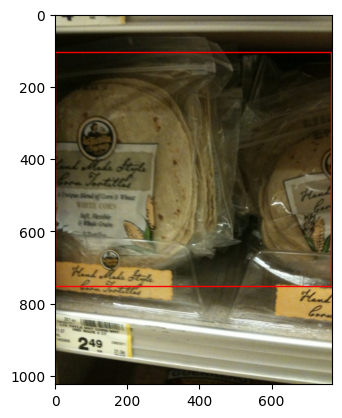

In [1318]:
#Theory Lesson

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(os.path.join(train_images_dir, '029cf7b6d1a98a8c.jpg'))

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height) # 768 1024




xmin = 0.0 * image_width
xmax = 0.9968 * image_width
ymin = 0.1 * image_height
ymax = 0.7339 * image_height


width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin,ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')


ax.add_patch(rect)
plt.show()

1024 683


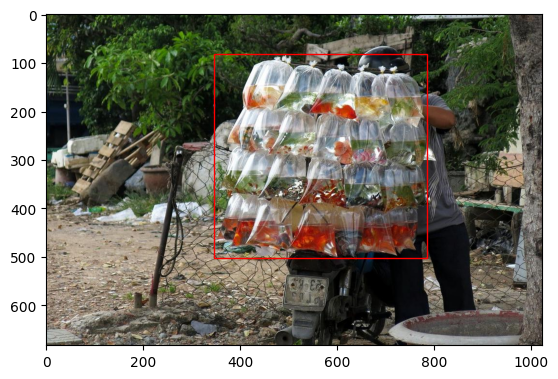

In [1319]:
#Theory Lesson

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Use a valid image path from dataset (replace with actual if needed)
im = Image.open(os.path.join(train_images_dir, '004bd64410736c69.jpg'))
im = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height) # Expected: 1024 683 (adjusted for your image)

# Sample normalized coords from JSON for this image (flipped Plastic bag)
xmin_flipped_norm = 1 - 0.6611  # Flipped from original xmax_norm
xmax_flipped_norm = 1 - 0.2328  # Flipped from original xmin_norm
ymin_norm = 0.1186
ymax_norm = 0.7358

xmin = xmin_flipped_norm * image_width
xmax = xmax_flipped_norm * image_width
ymin = ymin_norm * image_height
ymax = ymax_norm * image_height


  
width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
ax.add_patch(rect)


  # Display the image
ax.imshow(im)
plt.show()

In [1320]:
# import shutil
# shutil.move('','')

Train images: ['flipped_09f9fb6ef25b1eda.jpg', 'flipped_05307e6f3f7d7daf.jpg', '084a2d27ffddd858.jpg', '04517668a869f2d8.jpg', '010de5bc26bb2f1e.jpg', '004bd64410736c69.jpg', '007653c739edf912.jpg', '017f439639163703.jpg', '00d67ab9e6db2059.jpg', 'flipped_011c2e4461eb1fdc.jpg', 'flipped_0889eb8501b7adce.jpg', '02362e80f8bf6a64.jpg', 'flipped_00f4db8fcca9763c.jpg', '010e5642fc0b392f.jpg', '059da2366c3be42c.jpg', 'flipped_015f845e4e01b04c.jpg', 'flipped_029cf7b6d1a98a8c.jpg', '08c7e8816f9c9ed9.jpg', '073dd5489a8faed7.jpg', '008e55e8866c3a92.jpg', '0603f22006991971.jpg', 'flipped_05642dbfac7ae5b0.jpg', 'flipped_010de5bc26bb2f1e.jpg', 'flipped_007653c739edf912.jpg', 'flipped_017f439639163703.jpg', 'flipped_004bd64410736c69.jpg', 'flipped_04517668a869f2d8.jpg', '09f9fb6ef25b1eda.jpg', '05307e6f3f7d7daf.jpg', 'flipped_084a2d27ffddd858.jpg', '0889eb8501b7adce.jpg', '011c2e4461eb1fdc.jpg', 'flipped_00d67ab9e6db2059.jpg', 'flipped_02362e80f8bf6a64.jpg', 'flipped_0603f22006991971.jpg', 'flipped_

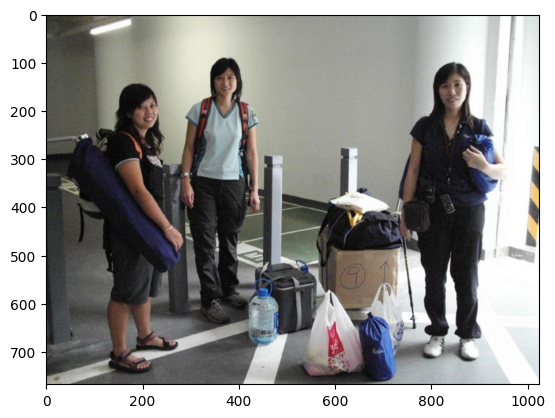

In [1321]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image
from pathlib import Path
import os

# Update paths to point to dataset/001.Plastic_bag/
base_dir = os.path.join(os.path.dirname(os.getcwd()), 'dataset')
test_images_path = os.path.join(base_dir, '001.Plastic_bag/images/test')  # Directory path
train_images_path = os.path.join(base_dir, '001.Plastic_bag/images/train')  # Directory path

# Debug: Check if images exist
print("Train images:", os.listdir(train_images_path))
print("Test images:", os.listdir(test_images_path))

def visualize_transposed_bb(dataset):
    images_path = train_images_path if dataset == 'train' else test_images_path if dataset == 'test' else 0
    if images_path == 0:
        raise Exception("Invalid input parameter, must be either train or test")
    
    # Add glob pattern for images
    image_folder = os.path.join(images_path, '*.jpg')
    images_paths = glob.glob(image_folder)
    num_of_images = len(images_paths)
    if num_of_images == 0:
        raise ValueError(f"No images found in {images_path}. Check path and files.")
    
    random_int = random.randint(0, num_of_images - 1)
    random_image = images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    id_of_image = Path(random_image).stem  # Use stem for ID
    
    df = final_train_df if dataset == 'train' else final_test_df
    # Update filter to match ImagePath format in final_*_df
    df_rows = df.loc[(df['ImagePath'] == f"dataset/001.Plastic_bag/images/{dataset}/{id_of_image}.jpg") & (df['className'] == '0.000')]
    
    image_width, image_height = img.size
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        print(new_xmin, new_xmax, new_ymin, new_ymax)
        
        # Flip the bb coordinates
        xmax_flipped = (image_width/2) - (new_xmin-(image_width/2))
        xmin_flipped = (image_width/2) - (new_xmax-(image_width/2))
        
        width = xmax_flipped - xmin_flipped
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((xmin_flipped, new_ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    
visualize_transposed_bb("train")

In [1322]:
len(final_test_df)

8

In [1323]:


# Update paths to point to dataset/001.Plastic_bag/
base_dir = os.path.join(os.path.dirname(os.getcwd()), 'dataset')
test_images_path = os.path.join(base_dir, '001.Plastic_bag/images/test')  # Directory path
train_images_path = os.path.join(base_dir, '001.Plastic_bag/images/train')  # Directory path

# Debug: Check if images exist
print("Train images:", os.listdir(train_images_path))
print("Test images:", os.listdir(test_images_path))

def augment_data(dataset):
    images_path = train_images_path if dataset == "train" else test_images_path if dataset == "test" else 0
    if images_path == 0:
        raise Exception("Invalid Input parameter")
    
    df = final_train_df if dataset == "train" else final_test_df
    
    temp_df = pd.DataFrame(columns=["header_cols","label_width","className","XMin","YMin","XMax","YMax","ImagePath"], dtype=object)
    counter = 0
    for index, row in df.iterrows():
        img_path = row["ImagePath"]  # Image path in the df
        id = Path(img_path).stem  # Use stem for ID
        im_path = os.path.join(images_path, f"{id}.jpg")  # Full image path
        img = Image.open(im_path)
        image_width, image_height = img.size
        img_flip = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        img_flip.save(os.path.join(images_path, f"flipped_{id}.jpg"))
        new_image_path = f"dataset/001.Plastic_bag/images/{dataset}/flipped_{id}.jpg"  # Full path in df
        
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin']
        ymax = row['YMax']
        
        # Get new coordinates for flipped bounding boxes
        new_xmin = ((image_width/2)-(xmin-(image_width/2))) / image_width
        new_xmax = ((image_width/2)-(xmax-(image_width/2))) / image_width
        
        temp_df.loc[counter] = [2, 5, "0.000", new_xmin, ymin, new_xmax, ymax, new_image_path]
        counter += 1
    
    df_merged = pd.concat([df, temp_df], ignore_index=True)

    # Save .lst in dataset/001.Plastic_bag/
    df_merged.to_csv(os.path.join(base_dir, f'001.Plastic_bag/{dataset}.lst'), sep="\t", float_format="%.4f", header=None)
    print(len(df))  # Original df
    print("augmented df length below")
    print(len(temp_df))

Train images: ['flipped_09f9fb6ef25b1eda.jpg', 'flipped_05307e6f3f7d7daf.jpg', '084a2d27ffddd858.jpg', '04517668a869f2d8.jpg', '010de5bc26bb2f1e.jpg', '004bd64410736c69.jpg', '007653c739edf912.jpg', '017f439639163703.jpg', '00d67ab9e6db2059.jpg', 'flipped_011c2e4461eb1fdc.jpg', 'flipped_0889eb8501b7adce.jpg', '02362e80f8bf6a64.jpg', 'flipped_00f4db8fcca9763c.jpg', '010e5642fc0b392f.jpg', '059da2366c3be42c.jpg', 'flipped_015f845e4e01b04c.jpg', 'flipped_029cf7b6d1a98a8c.jpg', '08c7e8816f9c9ed9.jpg', '073dd5489a8faed7.jpg', '008e55e8866c3a92.jpg', '0603f22006991971.jpg', 'flipped_05642dbfac7ae5b0.jpg', 'flipped_010de5bc26bb2f1e.jpg', 'flipped_007653c739edf912.jpg', 'flipped_017f439639163703.jpg', 'flipped_004bd64410736c69.jpg', 'flipped_04517668a869f2d8.jpg', '09f9fb6ef25b1eda.jpg', '05307e6f3f7d7daf.jpg', 'flipped_084a2d27ffddd858.jpg', '0889eb8501b7adce.jpg', '011c2e4461eb1fdc.jpg', 'flipped_00d67ab9e6db2059.jpg', 'flipped_02362e80f8bf6a64.jpg', 'flipped_0603f22006991971.jpg', 'flipped_

In [1324]:
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

1


In [1325]:
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

1


In [1326]:
len(final_train_df)

32

In [1327]:
len(final_test_df)

8

In [1328]:
augment_data("test")

8
augmented df length below
8


In [1329]:
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

1


In [1330]:
162 * 2

324

In [1331]:
augment_data("train")

32
augmented df length below
32


In [1332]:
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

1


In [1333]:
449*2

898

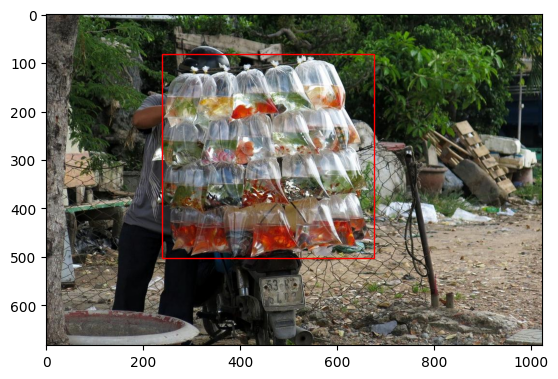

In [1334]:
im=Image.open(os.path.join(train_images_dir, '004bd64410736c69.jpg'))
w,h=im.size

# Sample: 0	2	5	0.000	0.2328	0.1186	0.6611	0.7358	001.Plastic_bag/images/train/004bd64410736c69.jpg


fig, ax = plt.subplots()
xmin = 0.2328
xmax = 0.6611
ymin = 0.1186
ymax = 0.7358

xmin=xmin*w
xmax=xmax*w
ymin=ymin*h
ymax=ymax*h


  
width=xmax-xmin
height=ymax-ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
ax.add_patch(rect)


  # Display the image
ax.imshow(im)
plt.show()

1024 683


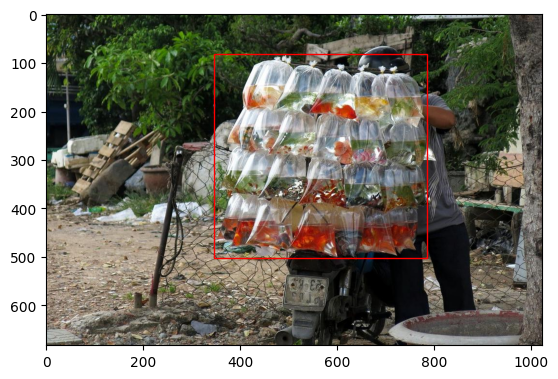

In [1335]:
#Theory Lesson

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Use a valid image path from dataset (replace with actual if needed)
im = Image.open(os.path.join(train_images_dir, '004bd64410736c69.jpg'))
im = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height) # Expected: 1024 683 (adjusted for your image)

# Sample normalized coords from JSON for this image (flipped Plastic bag)
xmin_flipped_norm = 1 - 0.6611  # Flipped from original xmax_norm
xmax_flipped_norm = 1 - 0.2328  # Flipped from original xmin_norm
ymin_norm = 0.1186
ymax_norm = 0.7358

xmin = xmin_flipped_norm * image_width
xmax = xmax_flipped_norm * image_width
ymin = ymin_norm * image_height
ymax = ymax_norm * image_height


  
width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
ax.add_patch(rect)


  # Display the image
ax.imshow(im)
plt.show()

In [1336]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install mxnet
!{sys.executable} -m pip install distro numpy==1.23.5 --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl (21.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires numpy<2.0.0,>1.16.0, but you have numpy 2.0.2 which is incompatible.
langchain 0.2.6 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
langchain-community 0.2.6 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
faiss-cpu 1.8.0.post1 requires numpy<2.0,>=1.0, but you have numpy 2.0.2 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --

In [1337]:
import distro
import os

if distro.id() == "debian":
    os.system("apt-get update")
    os.system("apt-get install ffmpeg libsm6 libxext6 -y")


In [1338]:
RESIZE_SIZE = 256
BASE_DIR = os.path.join(os.path.dirname(os.getcwd()), 'dataset/001.Plastic_bag/')

In [1339]:
!python3 ../tools/im2rec.py --resize $RESIZE_SIZE --pack-label test.lst $BASE_DIR/images/


Creating .rec file from /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/src/test.lst in /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/src
multiprocessing not available, fall back to single threaded encoding
time: 0.11234307289123535  count: 0


In [1340]:
!python3 ../tools/im2rec.py --resize $RESIZE_SIZE --pack-label train.lst $BASE_DIR/images/

Creating .rec file from /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/src/train.lst in /Users/hamzaabbas/aws-object-detection-steve/pipeline-vanilla-object-detection/src
multiprocessing not available, fall back to single threaded encoding
time: 0.014414787292480469  count: 0
